## Transaction train

In [18]:
# Étape 1 - Chargement du CSV et aperçu général

import pandas as pd

# Charger le fichier (adapte le chemin si nécessaire)
df = pd.read_csv("/content/transactions_train.csv")

# Afficher les 5 premières lignes
print("Aperçu des premières lignes :")
display(df.head())

# Taille du dataset
print("\nDimensions du dataset :", df.shape)

# Informations sur les colonnes
print("\nInformations sur le DataFrame :")
df.info()


Aperçu des premières lignes :


,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,19765990,2017-07-07 09:53:00,1581,2519,$12.35,Chip Transaction,20519,Arnold,MO,63010.0,5942,NaN
1,22160255,2018-11-26 17:44:00,1862,4049,$58.29,Chip Transaction,98648,Des Moines,IA,50313.0,5814,NaN
2,17566794,2016-03-26 12:42:00,1967,3367,$11.03,Chip Transaction,46978,Lake Forest,CA,92630.0,5411,NaN
3,17318690,2016-02-01 08:30:00,921,3457,$85.74,Chip Transaction,63701,Rush,NY,14543.0,5411,NaN
4,20994060,2018-03-24 14:42:00,456,2800,$13.43,Chip Transaction,83271,Estero,FL,33928.0,4214,NaN



Dimensions du dataset : (210000, 12)

Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transaction_id  210000 non-null  int64  
 1   date            210000 non-null  object 
 2   client_id       210000 non-null  int64  
 3   card_id         210000 non-null  int64  
 4   amount          210000 non-null  object 
 5   use_chip        210000 non-null  object 
 6   merchant_id     210000 non-null  int64  
 7   merchant_city   210000 non-null  object 
 8   merchant_state  184569 non-null  object 
 9   zip             183203 non-null  float64
 10  mcc             210000 non-null  int64  
 11  errors          3273 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 19.2+ MB


In [19]:
# Étape 2 - Valeurs manquantes et types de variables

# Pourcentage de valeurs manquantes par colonne
missing_values = df.isnull().mean().sort_values(ascending=False) * 100
print("Pourcentage de valeurs manquantes par colonne (%):\n")
print(missing_values[missing_values > 0])

# Résumé des types de variables
print("\nTypes de variables :")
print(df.dtypes.value_counts())

# Colonnes catégorielles et numériques
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nColonnes catégorielles :", cat_cols)
print("Colonnes numériques :", num_cols)


Pourcentage de valeurs manquantes par colonne (%):

errors            98.441429
zip               12.760476
merchant_state    12.110000
dtype: float64

Types de variables :
object     6
int64      5
float64    1
Name: count, dtype: int64

Colonnes catégorielles : ['date', 'amount', 'use_chip', 'merchant_city', 'merchant_state', 'errors']
Colonnes numériques : ['transaction_id', 'client_id', 'card_id', 'merchant_id', 'zip', 'mcc']


In [20]:
# Étape - Afficher les lignes avec zip manquant

# Filtrer les lignes où zip est manquant
missing_zip = df[df['zip'].isnull()]

# Afficher le nombre total et les premières lignes
print(f"📉 Nombre de lignes avec zip manquant : {len(missing_zip)}")

# Aperçu des lignes concernées
display(missing_zip.head(10))


📉 Nombre de lignes avec zip manquant : 26797


,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
12,20446347,2017-11-28 11:58:00,696,39,$100.41,Chip Transaction,66278,Cabo San Lucas,Mexico,NaN,5310,NaN
14,19788807,2017-07-12 08:07:00,762,1080,$63.54,Online Transaction,39021,ONLINE,NaN,NaN,4784,NaN
15,17292719,2016-01-26 15:30:00,1358,3426,$26.96,Online Transaction,9932,ONLINE,NaN,NaN,5311,NaN
25,20453089,2017-11-29 19:05:00,456,4576,$43.09,Online Transaction,50404,ONLINE,NaN,NaN,4784,NaN
31,17200244,2016-01-06 20:13:00,566,4547,$19.83,Online Transaction,18563,ONLINE,NaN,NaN,4121,NaN
76,18511437,2016-10-13 23:30:00,1069,3922,$45.50,Online Transaction,39021,ONLINE,NaN,NaN,4784,NaN
115,18136589,2016-07-26 04:58:00,1080,2562,$140.08,Online Transaction,17976,ONLINE,NaN,NaN,4900,NaN
118,20523554,2017-12-14 16:57:00,1687,2509,$19.29,Online Transaction,16798,ONLINE,NaN,NaN,4121,NaN
122,20412243,2017-11-21 09:03:00,1629,4290,$23.10,Online Transaction,50404,ONLINE,NaN,NaN,4784,NaN
136,22204703,2018-12-06 09:05:00,1794,5205,$177.95,Online Transaction,61641,ONLINE,NaN,NaN,4900,NaN


In [21]:
# Étape 3 - Nettoyage simplifié

import pandas as pd

# --- 1. Conversion de la colonne 'date' en datetime complet ---
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# --- 2. Nettoyage de la colonne 'amount' ---
df['amount'] = df['amount'].replace('[\$,]', '', regex=True).astype(float)

# --- 3. Conversion en texte ---
text_columns = ['use_chip', 'merchant_city', 'merchant_state']
df[text_columns] = df[text_columns].astype(str)

# --- 4. Conversion du code postal en entier ---
df['zip'] = pd.to_numeric(df['zip'], errors='coerce').astype('Int64')

# --- 5. Vérification finale ---
print("✅ Types de données après nettoyage :")
print(df.dtypes)

# --- 6. Aperçu ---
print("\nAperçu des données nettoyées :")
display(df.head())


<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-442649050.py:9: SyntaxWarning: invalid escape sequence '\$'
  df['amount'] = df['amount'].replace('[\$,]', '', regex=True).astype(float)


✅ Types de données après nettoyage :
transaction_id             int64
date              datetime64[ns]
client_id                  int64
card_id                    int64
amount                   float64
use_chip                  object
merchant_id                int64
merchant_city             object
merchant_state            object
zip                        Int64
mcc                        int64
errors                    object
dtype: object

Aperçu des données nettoyées :


,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,19765990,2017-07-07 09:53:00,1581,2519,12.35,Chip Transaction,20519,Arnold,MO,63010,5942,NaN
1,22160255,2018-11-26 17:44:00,1862,4049,58.29,Chip Transaction,98648,Des Moines,IA,50313,5814,NaN
2,17566794,2016-03-26 12:42:00,1967,3367,11.03,Chip Transaction,46978,Lake Forest,CA,92630,5411,NaN
3,17318690,2016-02-01 08:30:00,921,3457,85.74,Chip Transaction,63701,Rush,NY,14543,5411,NaN
4,20994060,2018-03-24 14:42:00,456,2800,13.43,Chip Transaction,83271,Estero,FL,33928,4214,NaN


In [22]:
# Étape 3 - Homogénéisation des valeurs manquantes dans df_eval

# Valeurs considérées comme manquantes (tu peux en ajouter si besoin)
missing_like = ["nan", "NaN", "None", "NULL", "null", " ", ""]

# Remplacer ces valeurs par de vrais NaN
df= df.replace(missing_like, pd.NA)

# Vérifier le taux de valeurs manquantes à nouveau
missing_percent = df.isnull().mean() * 100
print("📊 Pourcentage de valeurs manquantes après homogénéisation :\n")
print(missing_percent.sort_values(ascending=False).head(15))


📊 Pourcentage de valeurs manquantes après homogénéisation :

errors            98.441429
zip               12.760476
merchant_state    12.110000
transaction_id     0.000000
card_id            0.000000
client_id          0.000000
date               0.000000
amount             0.000000
merchant_city      0.000000
merchant_id        0.000000
use_chip           0.000000
mcc                0.000000
dtype: float64


In [23]:
df.columns

Index(['transaction_id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors'],
      dtype='object')

In [24]:
# Étape 4 - Pourcentage de lignes où zip ET merchant_state sont manquants

# Condition : les deux colonnes sont nulles simultanément
both_missing = df['zip'].isnull() & df['merchant_state'].isnull()

# Pourcentage correspondant
both_missing_pct = both_missing.mean() * 100

print(f"📉 Pourcentage de lignes où zip ET merchant_state sont manquants : {both_missing_pct:.2f}%")

# (Optionnel) afficher quelques exemples si besoin
display(df[both_missing].head())


📉 Pourcentage de lignes où zip ET merchant_state sont manquants : 12.11%


,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
14,19788807,2017-07-12 08:07:00,762,1080,63.54,Online Transaction,39021,ONLINE,<NA>,<NA>,4784,NaN
15,17292719,2016-01-26 15:30:00,1358,3426,26.96,Online Transaction,9932,ONLINE,<NA>,<NA>,5311,NaN
25,20453089,2017-11-29 19:05:00,456,4576,43.09,Online Transaction,50404,ONLINE,<NA>,<NA>,4784,NaN
31,17200244,2016-01-06 20:13:00,566,4547,19.83,Online Transaction,18563,ONLINE,<NA>,<NA>,4121,NaN
76,18511437,2016-10-13 23:30:00,1069,3922,45.50,Online Transaction,39021,ONLINE,<NA>,<NA>,4784,NaN


In [25]:
# Condition : zip ou merchant_city manquant
missing_zip_or_city = df['zip'].isnull() | df['merchant_state'].isnull()

# Condition : use_chip différent de "Online Transaction"
not_online = df['use_chip'].str.strip().str.lower() != 'online transaction'

# Condition : merchent_city différent de "Online"
not_online_city = df['merchant_city'].str.strip().str.lower() != 'online'


# Combinaison des deux conditions
condition = missing_zip_or_city & not_online & not_online_city

# Afficher les lignes correspondantes
print(f"📋 Nombre de lignes correspondant à la condition : {condition.sum()}")
display(df[condition].head(10))


📋 Nombre de lignes correspondant à la condition : 1366


,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
12,20446347,2017-11-28 11:58:00,696,39,100.41,Chip Transaction,66278,Cabo San Lucas,Mexico,<NA>,5310,NaN
161,21589551,2018-07-28 16:47:00,1256,6116,159.14,Chip Transaction,51300,Oslo,Norway,<NA>,3359,NaN
600,21108755,2018-04-18 00:11:00,848,5423,59.63,Chip Transaction,59056,Mexico City,Mexico,<NA>,5813,NaN
690,20881231,2018-02-28 15:59:00,1485,4736,58.52,Chip Transaction,99370,Rome,Italy,<NA>,5311,NaN
742,18144884,2016-07-27 16:03:00,1144,5153,271.00,Chip Transaction,12451,Paris,France,<NA>,7011,NaN
796,21498764,2018-07-09 15:40:00,254,1247,11.63,Chip Transaction,88939,Acapulco,Mexico,<NA>,5921,NaN
853,20223070,2017-10-12 06:53:00,1516,1002,22.19,Chip Transaction,48919,Tapei,Taiwan,<NA>,5311,NaN
877,21673111,2018-08-15 13:48:00,351,2664,0.70,Chip Transaction,31893,Rome,Italy,<NA>,5311,NaN
1067,22198781,2018-12-05 02:35:00,1022,5148,167.00,Chip Transaction,7777,Seoul,South Korea,<NA>,3684,NaN
1127,18289988,2016-08-27 18:41:00,804,5986,320.00,Chip Transaction,16790,Delhi,India,<NA>,3389,NaN


In [26]:
# Étape 4 - Compléter automatiquement les colonnes zip, merchant_city et merchant_state
# en ignorant les transactions "Online Transaction" et les villes nommées "Online"

# --- 1. Créer la référence à partir des lignes complètes et valides ---
reference = df[
    df['use_chip'].str.strip().str.lower() != 'online transaction'
]
reference = reference[
    (reference['merchant_city'].str.strip().str.lower() != 'online')
    & reference['merchant_city'].notna()
    & reference['merchant_state'].notna()
    & reference['zip'].notna()
]

# --- 2. Construire les dictionnaires de correspondance ---
city_to_state = reference.groupby('merchant_city')['merchant_state'].agg(lambda x: x.mode()[0]).to_dict()
city_to_zip = reference.groupby('merchant_city')['zip'].agg(lambda x: x.mode()[0]).to_dict()
zip_to_city = reference.groupby('zip')['merchant_city'].agg(lambda x: x.mode()[0]).to_dict()
zip_to_state = reference.groupby('zip')['merchant_state'].agg(lambda x: x.mode()[0]).to_dict()

# --- 3. Fonction de remplissage (avec filtrage des cas à ignorer) ---
def fill_missing(row):
    # Ignorer les lignes à exclure
    if (
        str(row['use_chip']).strip().lower() == 'online transaction'
        or str(row['merchant_city']).strip().lower() == 'online'
    ):
        return row

    # Compléter les champs manquants
    if pd.isnull(row['merchant_city']):
        row['merchant_city'] = zip_to_city.get(row['zip'], row['merchant_city'])
    if pd.isnull(row['merchant_state']):
        row['merchant_state'] = city_to_state.get(row['merchant_city'], zip_to_state.get(row['zip'], row['merchant_state']))
    if pd.isnull(row['zip']):
        row['zip'] = city_to_zip.get(row['merchant_city'], row['zip'])
    return row

# --- 4. Appliquer le remplissage ---
df = df.apply(fill_missing, axis=1)

# --- 5. Vérification ---
print("✅ Valeurs manquantes après auto-complétion :")
print(df[['merchant_city', 'merchant_state', 'zip']].isnull().sum())

# --- 6. Exemple des lignes complétées ---
print("\n🔍 Exemples de lignes complétées (hors Online Transaction) :")
display(df[
    (df['use_chip'].str.strip().str.lower() != 'online transaction')
    & (df['merchant_city'].str.strip().str.lower() != 'online')
].sample(5))


✅ Valeurs manquantes après auto-complétion :
merchant_city         0
merchant_state    25431
zip               26299
dtype: int64

🔍 Exemples de lignes complétées (hors Online Transaction) :


,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
44405,18627539,2016-11-07 19:17:00,729,226,40.86,Chip Transaction,10246,Frankfort,IN,46041,5651,NaN
46951,20789534,2018-02-09 07:52:00,1314,1140,77.91,Swipe Transaction,61195,New Braunfels,TX,78130,5541,NaN
170784,19519709,2017-05-16 13:26:00,571,312,64.28,Chip Transaction,32175,Martinsburg,WV,25404,7538,NaN
164780,19907119,2017-08-06 07:08:00,1837,259,57.00,Chip Transaction,59935,Los Angeles,CA,90001,5499,NaN
203913,19797930,2017-07-14 06:16:00,1437,6062,1.33,Chip Transaction,86438,Belfair,WA,98528,5499,NaN


In [27]:
# Condition : zip ou merchant_city manquant
missing_zip_or_city = df['zip'].isnull() | df['merchant_state'].isnull()

# Condition : use_chip différent de "Online Transaction"
not_online = df['use_chip'].str.strip().str.lower() != 'online transaction'

# Condition : merchent_city différent de "Online"
not_online_city = df['merchant_city'].str.strip().str.lower() != 'online'


# Combinaison des deux conditions
condition = missing_zip_or_city & not_online & not_online_city

# Afficher les lignes correspondantes
print(f"📋 Nombre de lignes correspondant à la condition : {condition.sum()}")
display(df[condition].head(10))


📋 Nombre de lignes correspondant à la condition : 868


,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
12,20446347,2017-11-28 11:58:00,696,39,100.41,Chip Transaction,66278,Cabo San Lucas,Mexico,<NA>,5310,NaN
161,21589551,2018-07-28 16:47:00,1256,6116,159.14,Chip Transaction,51300,Oslo,Norway,<NA>,3359,NaN
600,21108755,2018-04-18 00:11:00,848,5423,59.63,Chip Transaction,59056,Mexico City,Mexico,<NA>,5813,NaN
796,21498764,2018-07-09 15:40:00,254,1247,11.63,Chip Transaction,88939,Acapulco,Mexico,<NA>,5921,NaN
853,20223070,2017-10-12 06:53:00,1516,1002,22.19,Chip Transaction,48919,Tapei,Taiwan,<NA>,5311,NaN
1067,22198781,2018-12-05 02:35:00,1022,5148,167.00,Chip Transaction,7777,Seoul,South Korea,<NA>,3684,NaN
1127,18289988,2016-08-27 18:41:00,804,5986,320.00,Chip Transaction,16790,Delhi,India,<NA>,3389,NaN
1203,19408945,2017-04-22 23:29:00,1807,2823,430.00,Chip Transaction,77898,Budapest,Hungary,<NA>,7011,NaN
1355,21341596,2018-06-06 12:36:00,1770,6054,20.29,Chip Transaction,45926,Cancun,Mexico,<NA>,5814,NaN
1792,21832856,2018-09-18 11:09:00,98,4237,3.59,Chip Transaction,16927,Hong Kong,Hong Kong,<NA>,5411,NaN


📊 Statistiques descriptives des variables numériques :



,transaction_id,date,client_id,card_id,amount,merchant_id,mcc
count,2.100000e+05,210000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000
mean,1.974756e+07,2017-07-03 01:52:08.139428608,1026.688005,3525.187081,42.552883,48042.276714,5571.994757
min,1.717259e+07,2016-01-01 00:29:00,0.000000,0.000000,-500.000000,22.000000,1711.000000
25%,1.846539e+07,2016-10-04 09:03:15,556.000000,2443.000000,8.730000,25887.000000,5300.000000
50%,1.974602e+07,2017-07-03 08:58:00,1073.000000,3675.000000,28.170000,46284.000000,5499.000000
75%,2.103520e+07,2018-04-02 11:26:15,1520.000000,4949.000000,62.260000,68751.000000,5813.000000
max,2.232644e+07,2018-12-31 23:31:00,1997.000000,6138.000000,2775.670000,100340.000000,9402.000000
std,1.485640e+06,NaN,573.042079,1678.768342,80.669268,25936.173379,883.626390



🔤 Statistiques des variables catégorielles :


use_chip :
use_chip
Chip Transaction      150302
Swipe Transaction      34440
Online Transaction     25258
Name: count, dtype: int64

merchant_city :
merchant_city
ONLINE             25431
Miami               1788
Houston             1779
Brooklyn            1465
Louisville          1311
Indianapolis        1160
Dallas              1122
Philadelphia        1115
North Hollywood     1054
Chicago             1044
Name: count, dtype: int64

merchant_state :
merchant_state
CA    20694
TX    14947
NY    13748
FL    11982
NC     7646
OH     7565
IL     7318
MI     6303
PA     6004
NJ     5782
Name: count, dtype: int64

errors :
errors
Insufficient Balance                     2005
Bad PIN                                   504
Technical Glitch                          406
Bad Card Number                           129
Bad Expiration                             99
Bad CVV                                    97
Bad Zipcode                             

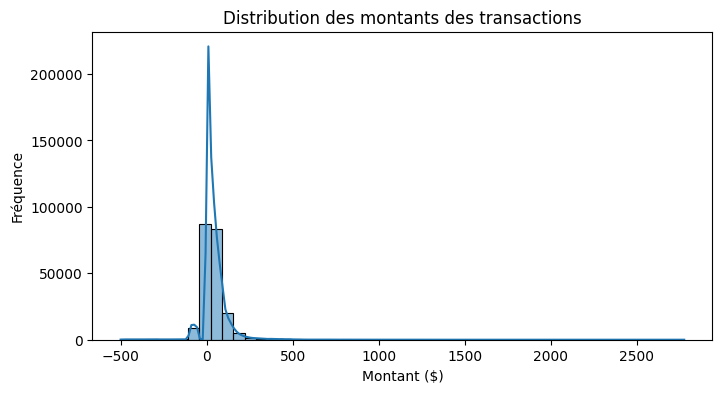

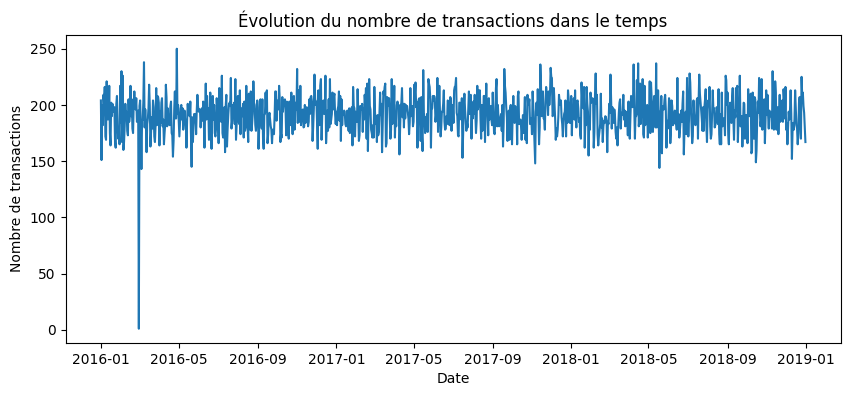

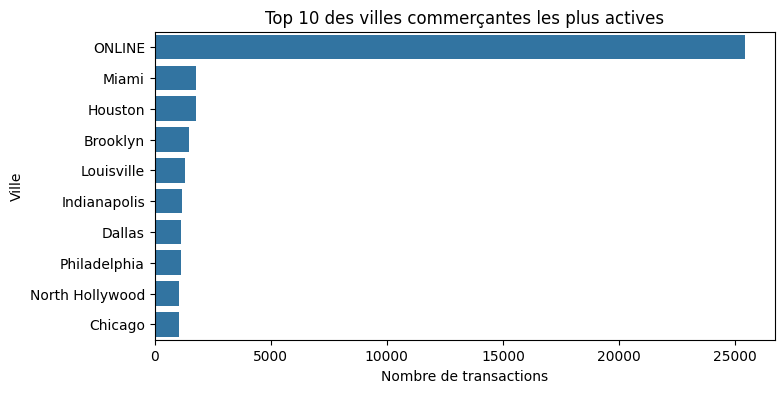

In [28]:
# Étape 4 - Statistiques descriptives et exploration de base

import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Statistiques descriptives des variables numériques ---
print("📊 Statistiques descriptives des variables numériques :\n")
display(df.describe())

# --- 2. Statistiques descriptives des variables catégorielles ---
print("\n🔤 Statistiques des variables catégorielles :\n")
for col in ['use_chip', 'merchant_city', 'merchant_state','errors']:
    print(f"\n{col} :")
    print(df[col].value_counts().head(10))

# --- 3. Distribution du montant des transactions ---
plt.figure(figsize=(8, 4))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title("Distribution des montants des transactions")
plt.xlabel("Montant ($)")
plt.ylabel("Fréquence")
plt.show()

# --- 4. Évolution du nombre de transactions dans le temps ---
plt.figure(figsize=(10, 4))
df['date_only'] = df['date'].dt.date
df.groupby('date_only').size().plot()
plt.title("Évolution du nombre de transactions dans le temps")
plt.xlabel("Date")
plt.ylabel("Nombre de transactions")
plt.show()

# --- 5. Top 10 des villes commerçantes les plus actives ---
top_cities = df['merchant_city'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Top 10 des villes commerçantes les plus actives")
plt.xlabel("Nombre de transactions")
plt.ylabel("Ville")
plt.show()


In [29]:
# Étape finale - Sauvegarde du DataFrame nettoyé

# Nom du fichier de sortie
output_path = "/content/transactions_train_cleaned.csv"

# Sauvegarde en CSV
df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"💾 Fichier nettoyé enregistré sous : {output_path}")


💾 Fichier nettoyé enregistré sous : /content/transactions_train_cleaned.csv


## Evaluation features

In [30]:
# Étape 1 - Chargement du CSV et aperçu général

import pandas as pd

# Charger le fichier (adapte le chemin si nécessaire)
df_eval = pd.read_csv("/content/evaluation_features.csv")

# Afficher les 5 premières lignes
print("Aperçu des premières lignes :")
display(df_eval.head())

# Taille du dataset
print("\nDimensions du dataset :", df_eval.shape)

# Informations sur les colonnes
print("\nInformations sur le DataFrame :")
df_eval.info()


Aperçu des premières lignes :


,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,23042130,2019-06-01 14:41:00,900,3412,$118.61,Swipe Transaction,61195,Panama City,FL,32401.0,5541,NaN
1,22702314,2019-03-21 13:45:00,1741,3025,$-204.00,Chip Transaction,49637,Tucson,AZ,85736.0,3509,NaN
2,22838524,2019-04-19 11:53:00,1081,3892,$-99.00,Chip Transaction,43293,Aurora,CO,80013.0,5499,NaN
3,23477219,2019-09-01 11:46:00,1740,2382,$28.44,Chip Transaction,26032,Mukwonago,WI,53149.0,7210,NaN
4,23066897,2019-06-06 21:24:00,1207,6056,$32.02,Online Transaction,39021,ONLINE,NaN,NaN,4784,NaN



Dimensions du dataset : (90000, 12)

Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  90000 non-null  int64  
 1   date            90000 non-null  object 
 2   client_id       90000 non-null  int64  
 3   card_id         90000 non-null  int64  
 4   amount          90000 non-null  object 
 5   use_chip        90000 non-null  object 
 6   merchant_id     90000 non-null  int64  
 7   merchant_city   90000 non-null  object 
 8   merchant_state  78273 non-null  object 
 9   zip             77362 non-null  float64
 10  mcc             90000 non-null  int64  
 11  errors          1481 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 8.2+ MB


In [31]:
# Étape 2 - Valeurs manquantes et types de variables

# Pourcentage de valeurs manquantes par colonne
missing_values = df_eval.isnull().mean().sort_values(ascending=False) * 100
print("Pourcentage de valeurs manquantes par colonne (%):\n")
print(missing_values[missing_values > 0])

# Résumé des types de variables
print("\nTypes de variables :")
print(df_eval.dtypes.value_counts())

# Colonnes catégorielles et numériques
cat_cols = df_eval.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df_eval.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nColonnes catégorielles :", cat_cols)
print("Colonnes numériques :", num_cols)


Pourcentage de valeurs manquantes par colonne (%):

errors            98.354444
zip               14.042222
merchant_state    13.030000
dtype: float64

Types de variables :
object     6
int64      5
float64    1
Name: count, dtype: int64

Colonnes catégorielles : ['date', 'amount', 'use_chip', 'merchant_city', 'merchant_state', 'errors']
Colonnes numériques : ['transaction_id', 'client_id', 'card_id', 'merchant_id', 'zip', 'mcc']


In [32]:
# Étape 3 - Nettoyage simplifié

import pandas as pd

# --- 1. Conversion de la colonne 'date' en datetime complet ---
df_eval['date'] = pd.to_datetime(df_eval['date'], errors='coerce')

# --- 2. Nettoyage de la colonne 'amount' ---
df_eval['amount'] = df_eval['amount'].replace('[\$,]', '', regex=True).astype(float)

# --- 3. Conversion en texte ---
text_columns = ['use_chip', 'merchant_city', 'merchant_state']
df_eval[text_columns] = df_eval[text_columns].astype(str)

# --- 4. Conversion du code postal en entier ---
df_eval['zip'] = pd.to_numeric(df_eval['zip'], errors='coerce').astype('Int64')

# --- 5. Vérification finale ---
print("✅ Types de données après nettoyage :")
print(df_eval.dtypes)

# --- 6. Aperçu ---
print("\nAperçu des données nettoyées :")
display(df_eval.head())


✅ Types de données après nettoyage :
transaction_id             int64
date              datetime64[ns]
client_id                  int64
card_id                    int64
amount                   float64
use_chip                  object
merchant_id                int64
merchant_city             object
merchant_state            object
zip                        Int64
mcc                        int64
errors                    object
dtype: object

Aperçu des données nettoyées :


<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3279835812.py:9: SyntaxWarning: invalid escape sequence '\$'
  df_eval['amount'] = df_eval['amount'].replace('[\$,]', '', regex=True).astype(float)


,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,23042130,2019-06-01 14:41:00,900,3412,118.61,Swipe Transaction,61195,Panama City,FL,32401,5541,NaN
1,22702314,2019-03-21 13:45:00,1741,3025,-204.00,Chip Transaction,49637,Tucson,AZ,85736,3509,NaN
2,22838524,2019-04-19 11:53:00,1081,3892,-99.00,Chip Transaction,43293,Aurora,CO,80013,5499,NaN
3,23477219,2019-09-01 11:46:00,1740,2382,28.44,Chip Transaction,26032,Mukwonago,WI,53149,7210,NaN
4,23066897,2019-06-06 21:24:00,1207,6056,32.02,Online Transaction,39021,ONLINE,nan,<NA>,4784,NaN


In [33]:
# Étape - Homogénéisation des valeurs manquantes dans df_eval

# Valeurs considérées comme manquantes (tu peux en ajouter si besoin)
missing_like = ["nan", "NaN", "None", "NULL", "null", " ", ""]

# Remplacer ces valeurs par de vrais NaN
df_eval= df_eval.replace(missing_like, pd.NA)

# Vérifier le taux de valeurs manquantes à nouveau
missing_percent = df_eval.isnull().mean() * 100
print("📊 Pourcentage de valeurs manquantes après homogénéisation :\n")
print(missing_percent.sort_values(ascending=False).head(10))


📊 Pourcentage de valeurs manquantes après homogénéisation :

errors            98.354444
zip               14.042222
merchant_state    13.030000
transaction_id     0.000000
card_id            0.000000
client_id          0.000000
date               0.000000
amount             0.000000
merchant_city      0.000000
merchant_id        0.000000
dtype: float64


In [34]:
# Étape 4 - Pourcentage de lignes où zip ET merchant_state sont manquants

# Condition : les deux colonnes sont nulles simultanément
both_missing = df_eval['zip'].isnull() & df_eval['merchant_state'].isnull()

# Pourcentage correspondant
both_missing_pct = both_missing.mean() * 100

print(f"📉 Pourcentage de lignes où zip ET merchant_state sont manquants : {both_missing_pct:.2f}%")

# (Optionnel) afficher quelques exemples si besoin
display(df_eval[both_missing].head())


📉 Pourcentage de lignes où zip ET merchant_state sont manquants : 13.03%


,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
4,23066897,2019-06-06 21:24:00,1207,6056,32.02,Online Transaction,39021,ONLINE,<NA>,<NA>,4784,NaN
7,22575801,2019-02-22 17:06:00,1008,2592,9.10,Online Transaction,16798,ONLINE,<NA>,<NA>,4121,NaN
10,23054409,2019-06-04 08:47:00,1116,5559,13.63,Online Transaction,39021,ONLINE,<NA>,<NA>,4784,NaN
16,23236533,2019-07-12 15:41:00,1963,3364,17.83,Online Transaction,16798,ONLINE,<NA>,<NA>,4121,NaN
21,22877839,2019-04-27 15:29:00,1098,1320,12.13,Online Transaction,88459,ONLINE,<NA>,<NA>,5311,NaN


In [35]:
# Condition : zip ou merchant_city manquant
missing_zip_or_city = df_eval['zip'].isnull() | df_eval['merchant_state'].isnull()

# Condition : use_chip différent de "Online Transaction"
not_online = df_eval['use_chip'].str.strip().str.lower() != 'online transaction'

# Condition : merchent_city différent de "Online"
not_online_city = df_eval['merchant_city'].str.strip().str.lower() != 'online'


# Combinaison des deux conditions
condition = missing_zip_or_city & not_online & not_online_city

# Afficher les lignes correspondantes
print(f"📋 Nombre de lignes correspondant à la condition : {condition.sum()}")
display(df_eval[condition].head(10))


📋 Nombre de lignes correspondant à la condition : 911


,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
99,22938676,2019-05-10 15:00:00,514,2155,6.93,Chip Transaction,88930,Berlin,Germany,<NA>,5912,NaN
156,22485945,2019-02-03 16:25:00,1664,5147,1.16,Swipe Transaction,14528,Berlin,Germany,<NA>,5499,NaN
288,23228013,2019-07-10 22:10:00,917,2887,-371.00,Chip Transaction,66954,Puerto Vallarta,Mexico,<NA>,7011,NaN
473,22669869,2019-03-14 16:36:00,1098,4626,54.44,Chip Transaction,22204,Rome,Italy,<NA>,5541,NaN
589,23451771,2019-08-26 23:35:00,1079,2842,103.80,Chip Transaction,246,Santo Domingo,Dominican Republic,<NA>,5812,NaN
806,23129269,2019-06-20 07:21:00,338,1317,8.00,Chip Transaction,16187,Brazzaville,Republic of the Congo,<NA>,5411,NaN
877,23121768,2019-06-18 12:48:00,208,4980,-73.00,Chip Transaction,22204,Toronto,Canada,<NA>,5541,NaN
911,22838552,2019-04-19 11:57:00,1041,2500,36.50,Chip Transaction,69972,Rome,Italy,<NA>,5814,NaN
997,22686652,2019-03-18 08:16:00,1098,2253,68.00,Chip Transaction,43293,Rome,Italy,<NA>,5499,NaN
1076,22812945,2019-04-14 01:12:00,1307,111,44.46,Chip Transaction,88718,Kolkata,India,<NA>,5813,NaN


In [36]:
# Étape 4 - Compléter automatiquement les colonnes zip, merchant_city et merchant_state
# en ignorant les transactions "Online Transaction" et les villes nommées "Online"

# --- 1. Créer la référence à partir des lignes complètes et valides ---
reference = df_eval[
    df_eval['use_chip'].str.strip().str.lower() != 'online transaction'
]
reference = reference[
    (reference['merchant_city'].str.strip().str.lower() != 'online')
    & reference['merchant_city'].notna()
    & reference['merchant_state'].notna()
    & reference['zip'].notna()
]

# --- 2. Construire les dictionnaires de correspondance ---
city_to_state = reference.groupby('merchant_city')['merchant_state'].agg(lambda x: x.mode()[0]).to_dict()
city_to_zip = reference.groupby('merchant_city')['zip'].agg(lambda x: x.mode()[0]).to_dict()
zip_to_city = reference.groupby('zip')['merchant_city'].agg(lambda x: x.mode()[0]).to_dict()
zip_to_state = reference.groupby('zip')['merchant_state'].agg(lambda x: x.mode()[0]).to_dict()

# --- 3. Fonction de remplissage (avec filtrage des cas à ignorer) ---
def fill_missing(row):
    # Ignorer les lignes à exclure
    if (
        str(row['use_chip']).strip().lower() == 'online transaction'
        or str(row['merchant_city']).strip().lower() == 'online'
    ):
        return row

    # Compléter les champs manquants
    if pd.isnull(row['merchant_city']):
        row['merchant_city'] = zip_to_city.get(row['zip'], row['merchant_city'])
    if pd.isnull(row['merchant_state']):
        row['merchant_state'] = city_to_state.get(row['merchant_city'], zip_to_state.get(row['zip'], row['merchant_state']))
    if pd.isnull(row['zip']):
        row['zip'] = city_to_zip.get(row['merchant_city'], row['zip'])
    return row

# --- 4. Appliquer le remplissage ---
df_eval = df_eval.apply(fill_missing, axis=1)

# --- 5. Vérification ---
print("✅ Valeurs manquantes après auto-complétion :")
print(df_eval[['merchant_city', 'merchant_state', 'zip']].isnull().sum())

# --- 6. Exemple des lignes complétées ---
print("\n🔍 Exemples de lignes complétées (hors Online Transaction) :")
display(df_eval[
    (df_eval['use_chip'].str.strip().str.lower() != 'online transaction')
    & (df_eval['merchant_city'].str.strip().str.lower() != 'online')
].sample(5))


✅ Valeurs manquantes après auto-complétion :
merchant_city         0
merchant_state    11727
zip               12171
dtype: int64

🔍 Exemples de lignes complétées (hors Online Transaction) :


,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
2082,23143731,2019-06-23 07:06:00,61,2265,70.51,Swipe Transaction,86410,Yonkers,NY,10701,5211,NaN
49917,23540865,2019-09-14 19:53:00,1098,1320,41.99,Chip Transaction,59935,Odebolt,IA,51458,5499,NaN
17141,22984892,2019-05-20 12:23:00,457,5554,8.22,Chip Transaction,60569,Charlotte,NC,28215,5300,NaN
70760,22710248,2019-03-23 08:01:00,1931,3530,2.55,Chip Transaction,50867,Arlington,MA,2476,5541,NaN
2331,23710455,2019-10-20 22:20:00,961,4584,51.23,Chip Transaction,96971,Odessa,FL,33556,5812,NaN


In [37]:
# Condition : zip ou merchant_city manquant
missing_zip_or_city = df_eval['zip'].isnull() | df_eval['merchant_state'].isnull()

# Condition : use_chip différent de "Online Transaction"
not_online = df_eval['use_chip'].str.strip().str.lower() != 'online transaction'

# Condition : merchent_city différent de "Online"
not_online_city = df_eval['merchant_city'].str.strip().str.lower() != 'online'


# Combinaison des deux conditions
condition = missing_zip_or_city & not_online & not_online_city

# Afficher les lignes correspondantes
print(f"📋 Nombre de lignes correspondant à la condition : {condition.sum()}")
display(df_eval[condition].head(10))


📋 Nombre de lignes correspondant à la condition : 444


,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
288,23228013,2019-07-10 22:10:00,917,2887,-371.00,Chip Transaction,66954,Puerto Vallarta,Mexico,<NA>,7011,NaN
589,23451771,2019-08-26 23:35:00,1079,2842,103.80,Chip Transaction,246,Santo Domingo,Dominican Republic,<NA>,5812,NaN
806,23129269,2019-06-20 07:21:00,338,1317,8.00,Chip Transaction,16187,Brazzaville,Republic of the Congo,<NA>,5411,NaN
877,23121768,2019-06-18 12:48:00,208,4980,-73.00,Chip Transaction,22204,Toronto,Canada,<NA>,5541,NaN
1076,22812945,2019-04-14 01:12:00,1307,111,44.46,Chip Transaction,88718,Kolkata,India,<NA>,5813,NaN
1220,23000448,2019-05-23 20:43:00,1140,2845,28.48,Swipe Transaction,72620,Santo Domingo,Dominican Republic,<NA>,5813,NaN
1899,22944699,2019-05-11 20:34:00,1140,3148,47.77,Chip Transaction,72620,Santo Domingo,Dominican Republic,<NA>,5813,NaN
1998,23419744,2019-08-20 09:26:00,335,353,6.85,Chip Transaction,1344,Puerto Vallarta,Mexico,<NA>,5411,NaN
2065,23490499,2019-09-04 10:12:00,278,6016,3.95,Swipe Transaction,7505,Cancun,Mexico,<NA>,5812,NaN
2223,22925750,2019-05-07 20:39:00,1140,2845,52.69,Swipe Transaction,72620,Santo Domingo,Dominican Republic,<NA>,5813,NaN


📊 Statistiques descriptives des variables numériques :



,transaction_id,date,client_id,card_id,amount,merchant_id,mcc
count,9.000000e+04,90000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,2.304506e+07,2019-06-02 03:51:21.946666496,1069.879956,3406.071367,43.191097,47241.622178,5519.651322
min,2.232646e+07,2019-01-01 00:05:00,1.000000,1.000000,-499.000000,15.000000,1711.000000
25%,2.268447e+07,2019-03-17 16:39:45,515.000000,2426.000000,9.600000,25717.000000,5300.000000
50%,2.304465e+07,2019-06-02 08:04:00,1098.000000,3524.000000,28.690000,44795.000000,5499.000000
75%,2.340624e+07,2019-08-17 11:41:45,1609.000000,4706.000000,64.850000,66030.000000,5812.000000
max,2.376186e+07,2019-10-31 23:52:00,1998.000000,6134.000000,3471.130000,100337.000000,9402.000000
std,4.148893e+05,NaN,614.211929,1635.061297,80.350727,25629.980222,878.483676



🔤 Statistiques des variables catégorielles :


use_chip :
use_chip
Chip Transaction      62346
Swipe Transaction     16011
Online Transaction    11643
Name: count, dtype: int64

merchant_city :
merchant_city
ONLINE           11727
Vacaville         1774
San Francisco      982
Chicago            962
Houston            940
Oceanside          869
Pompano Beach      806
Granville          777
Brooklyn           714
Hawarden           705
Name: count, dtype: int64

merchant_state :
merchant_state
CA    12488
TX     7162
NY     5595
FL     5130
IL     4547
OH     3204
PA     3085
GA     2496
IA     2482
IN     2058
Name: count, dtype: int64

errors :
errors
Insufficient Balance                     916
Technical Glitch                         197
Bad PIN                                  188
Bad Card Number                           72
Bad Expiration                            48
Bad CVV                                   43
Bad Zipcode                                6
Bad PIN,Insufficient Bal

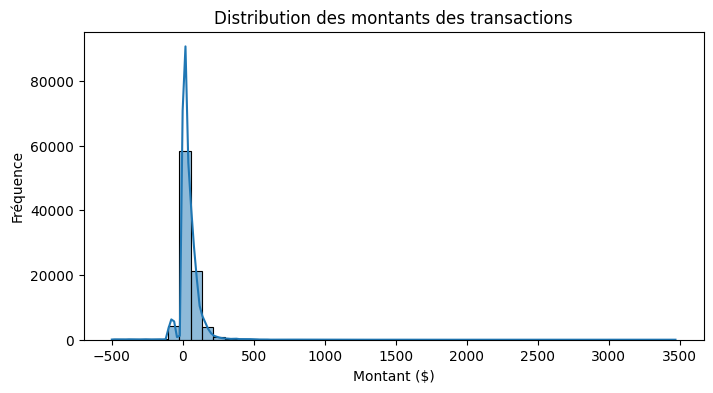

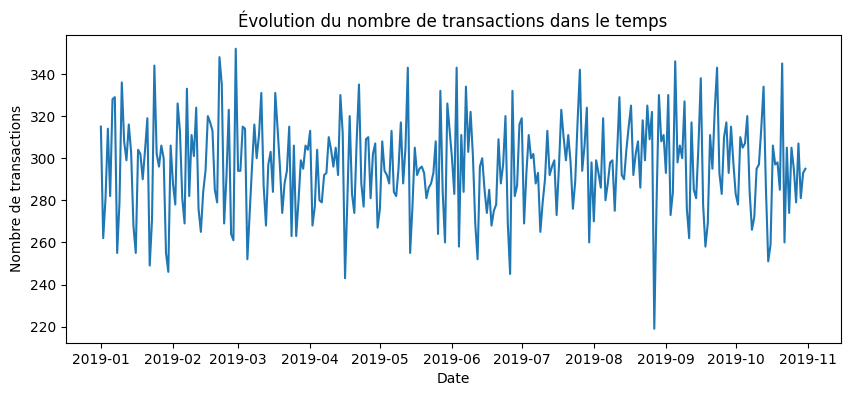

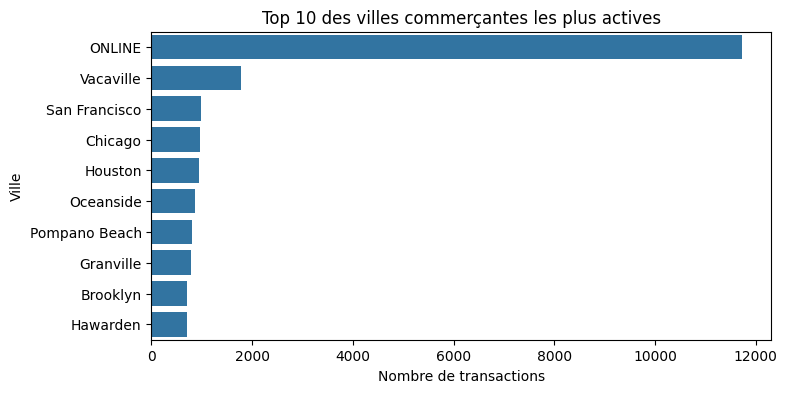

In [38]:
# Étape 4 - Statistiques descriptives et exploration de base

import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Statistiques descriptives des variables numériques ---
print("📊 Statistiques descriptives des variables numériques :\n")
display(df_eval.describe())

# --- 2. Statistiques descriptives des variables catégorielles ---
print("\n🔤 Statistiques des variables catégorielles :\n")
for col in ['use_chip', 'merchant_city', 'merchant_state','errors']:
    print(f"\n{col} :")
    print(df_eval[col].value_counts().head(10))

# --- 3. Distribution du montant des transactions ---
plt.figure(figsize=(8, 4))
sns.histplot(df_eval['amount'], bins=50, kde=True)
plt.title("Distribution des montants des transactions")
plt.xlabel("Montant ($)")
plt.ylabel("Fréquence")
plt.show()

# --- 4. Évolution du nombre de transactions dans le temps ---
plt.figure(figsize=(10, 4))
df_eval['date_only'] = df_eval['date'].dt.date
df_eval.groupby('date_only').size().plot()
plt.title("Évolution du nombre de transactions dans le temps")
plt.xlabel("Date")
plt.ylabel("Nombre de transactions")
plt.show()

# --- 5. Top 10 des villes commerçantes les plus actives ---
top_cities = df_eval['merchant_city'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Top 10 des villes commerçantes les plus actives")
plt.xlabel("Nombre de transactions")
plt.ylabel("Ville")
plt.show()


In [39]:
# Étape finale - Sauvegarde du DataFrame nettoyé

# Nom du fichier de sortie
output_path = "/content/evaluation_features_cleaned.csv"

# Sauvegarde en CSV
df_eval.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"💾 Fichier nettoyé enregistré sous : {output_path}")


💾 Fichier nettoyé enregistré sous : /content/evaluation_features_cleaned.csv
